##### Table of Contents

* [Intro](#intro)
* [Convulution](#conv)
* [Basic Code](#code)
* [Transfer Learning](#transfer)
* [Data Augmentation](#aug)
* [Stochastic Gradient Descent and Forward Propagation](#stoc)
    * [Soft Activation Method:Relu](#relu)
* [Dropouts and Strides](#drop)

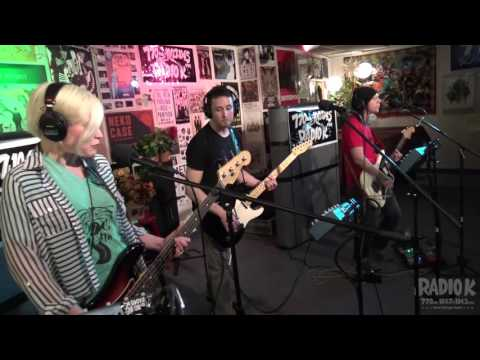

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('Fh3QDMbGTwM', width=800, height=450)


### Intro to TensorFlow <a name="intro"></a>

* Will be using TensorFlow for Deep Learning; it is most popular 
* For an image, it consist of matrix. For black and white, there is only one matrix.
    * For colored image there is three matrices for pixels
* A tensor is a specific size matrix seeking out patterns; it's essentially a magnifying glass looking through the image
* A convulution is when a tensor is scanned through an image. A convultion can be a filter as explained in the video; 
    * An horizontal line tensor can used. We can test it out by doing scaler multiplication and values can tell pattern fits


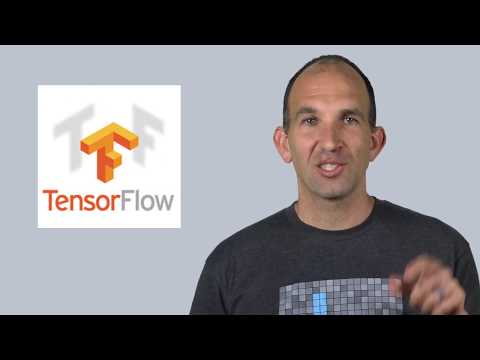

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('wG6rdUURU-w', width=800, height=450)

## Convulution <a name="conv"></a>

Different convulutions use different filters; they use gradient descent

* Each convulution creates a tensor. We can combine these tensors to create 3D image. Moving across dimensions (x,y,z, in images)
* For example, how is a car detected; it can work from a macro image, and then find several smaller patterns, and then go back a layer. There can be many iteractions.
* Object detection is a common usage; Imagenet is competitive neural network competition. For first model to be correct, 80% of the time it is good.


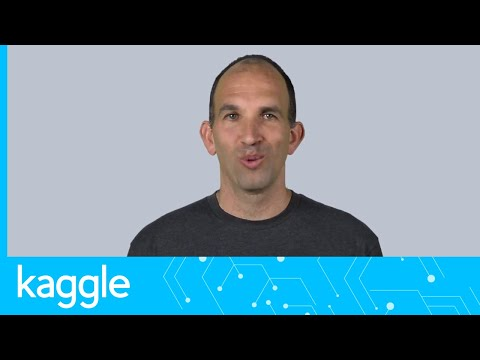

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ToBPiUlLFEY', width=800, height=450)

### Basic Code <a name="code"></a>

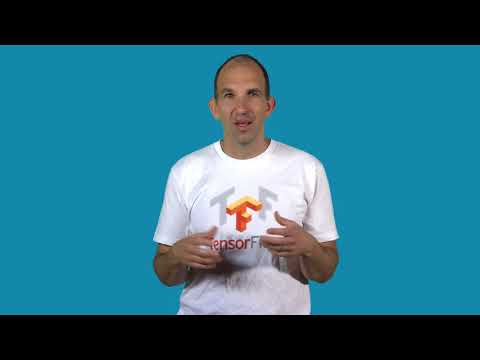

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('sDG5tPtsbSA', width=800, height=450)

In [26]:
from os.path import join

# Find impage directory
image_dir = 'Data/dog-breed-identification/train/'

# Select multidude of file to save in a list
img_paths = [join(image_dir, filename) for filename in 
                           ['0246f44bb123ce3f91c939861eb97fb7.jpg',
                            '84728e78632c0910a69d33f82e62638c.jpg',
                            '8825e914555803f4c67b26593c9d5aff.jpg',
                            '91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']]

In [27]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)



In [33]:
from tensorflow.python.keras.applications import ResNet50

#Create Model adn fit
my_model = ResNet50(weights='Data/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
#test_data = read_and_prep_images(img_paths)
#preds = my_model.predict(test_data)

In [ ]:
from learntools.deep_learning.decode_predictions import decode_predictions
from IPython.display import Image, display

#Predict with the model created and make top 3 recommendations for each image
most_likely_labels = decode_predictions(preds, top=3, class_list_path='Data/resnet50/imagenet_class_index.json')

#Prediction
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

### Lesson 4: Transfer Learning <a name="transfer"></a>

Suppose you want variation from an existing trained model?

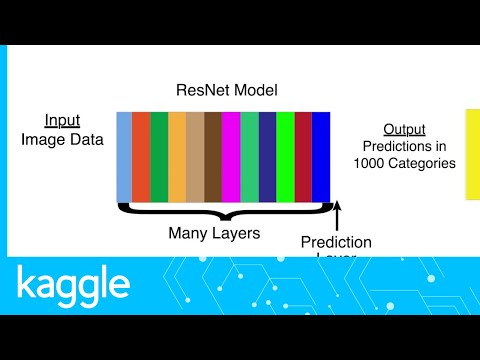

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('mPFq5KMxKVw', width=800, height=450)

Instead of creating a new model from scratch, **Transfer learning** allows you the same lessons/images from the previous model to be used. Most problems use low-level visual problems so pre-trained models can work well

For the Resnet model, there a multitude of layers where we remove the prediction layer. The last layer is special because it converts the previous specification into a one dimensional vector. 

![title](Images\tenlayer.png)

In this case, there are five nodes (usually there are many more); We create a new prediction layer in designing a new model

![title](Images\tenlast.png)

The last layer consist of a vector and it has five nodes. The goal is to train the model for the last layer

#### Specify Model:


In [2]:
# this is the trained tensor model
from tensorflow.python.keras.applications import ResNet50
# this is specifying that we intend to use tensor layers sequentially to train (typical)
from tensorflow.python.keras.models import Sequential 
# standard library?
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# classify urban and not urban
num_classes = 2
resnet_weights_path = 'Data/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

#create sequential model
my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, #this is false because we do not want to include the previous prediction layer
                          pooling='avg', #if we have additional tensors, we would want to collapse it to a one-dimensional tensor
                          weights=resnet_weights_path)) # specify the weight, which is existing model
my_new_model.add(Dense(num_classes, 
                       activation='softmax')) #the softmax function change it to probability

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#Compile MOdel
my_new_model.compile(optimizer='sgd', # stochastic gradient descent
                     loss='categorical_crossentropy', #log loss function
                     metrics=['accuracy']) #normal prediction

#Fit Model
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224

# We create an object indicating how data will be organized; NOTE the preprocess input is in resnet50
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        'Data/rural_and_urban_photos/train', #directory
        target_size=(image_size, image_size), #size of image
        batch_size=24, #read by 24 photos
        class_mode='categorical') #create category

validation_generator = data_generator.flow_from_directory(
        'Data/rural_and_urban_photos/val', #validation trajectory
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3, # how many images taken per step of training data; so it will be 8 photos per epoch?
        validation_data=validation_generator,
        validation_steps=1) # all the images will be batched in measuring value

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
3/3 [==============================] - 39s 13s/step - loss: 0.3155 - acc: 0.8611 - val_loss: 0.1364 - val_acc: 0.9500


In [4]:
my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=8, # how many images taken per step of training data; so it will be 8 photos per epoch?
        validation_data=validation_generator,
        validation_steps=1) # all the images will be batched in measuring value

3/3 [==============================] - 33s 11s/step - loss: 0.3422 - acc: 0.8194 - val_loss: 0.1659 - val_acc: 0.9500


### Data Augmentation <a name="aug"></a>

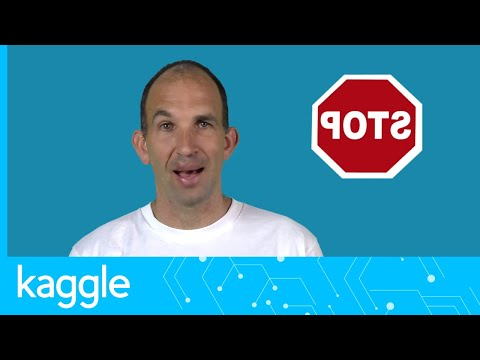

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('ypt_BAotCLo', width=800, height=450)

This is the process of **creating more images by doing slight variation of photos** such as horizontally flipping an image; However, for some cases, a mirror image of a stop sign is not valuable in identitification

Why do we need both a generator with augmentation and a generator without augmentation? After thinking about it, check out the solution below.?

Answer: We want to test the model using standard images; not the augmented ones which can lead to overfitting.

In [12]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True, #flips the image
                                   width_shift_range = 0.2, #shift the data slightly
                                   height_shift_range = 0.2) #sfist dat slightly

print(data_generator_with_aug)

train_generator = data_generator_with_aug.flow_from_directory(
        'Data/rural_and_urban_photos/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = data_generator_no_aug.flow_from_directory(
        'Data/rural_and_urban_photos/val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        epochs=2, # model iteration
        validation_data=validation_generator,
        validation_steps=1)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/2
3/3 [==============================] - 34s 11s/step - loss: 0.2729 - acc: 0.8889 - val_loss: 0.1294 - val_acc: 0.9500
Epoch 2/2
3/3 [==============================] - 34s 11s/step - loss: 0.1495 - acc: 0.9722 - val_loss: 0.1298 - val_acc: 0.9500


In [13]:
my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        epochs=4,
        validation_data=validation_generator,
        validation_steps=1)

Epoch 1/4
3/3 [==============================] - 35s 12s/step - loss: 0.1765 - acc: 0.9722 - val_loss: 0.1273 - val_acc: 0.9500
Epoch 2/4
3/3 [==============================] - 35s 12s/step - loss: 0.1481 - acc: 0.9861 - val_loss: 0.1170 - val_acc: 0.9500
Epoch 3/4
3/3 [==============================] - 34s 11s/step - loss: 0.1155 - acc: 0.9722 - val_loss: 0.1194 - val_acc: 0.9500
Epoch 4/4
3/3 [==============================] - 35s 12s/step - loss: 0.1257 - acc: 0.9861 - val_loss: 0.1131 - val_acc: 0.9500


#### Did the model do better with augmentation?

To test this I 

In [16]:
# Train moddel without augmentation
train_generator_no = data_generator_no_aug.flow_from_directory(
        'Data/rural_and_urban_photos/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

#fit model without augmentation
my_new_model.fit_generator(
        train_generator_no,
        steps_per_epoch=3,
        epochs=2, # model iteration
        validation_data=validation_generator,
        validation_steps=1)

Found 72 images belonging to 2 classes.
Epoch 1/2
3/3 [==============================] - 39s 13s/step - loss: 0.0865 - acc: 1.0000 - val_loss: 0.1126 - val_acc: 0.9500
Epoch 2/2
3/3 [==============================] - 40s 13s/step - loss: 0.0457 - acc: 1.0000 - val_loss: 0.1161 - val_acc: 0.9500


### Lesson 5: Stochastic Gradient Descent and Forward Propogation <a name="stoc"></a>

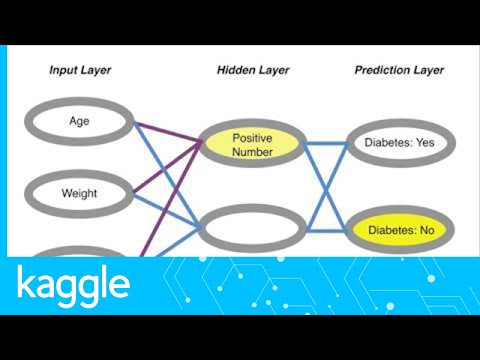

In [17]:
from IPython.display import YouTubeVideo
YouTubeVideo('kQmHaI5Jw1c', width=800, height=450)


Suppose we are predicting a patient will get diabetes:

![title](Images\tensorweightnodes.png)

Notice the weights are given to each interaction; the softmax function converts it to probability; in the example (5% for top node and 95% bottom node). So patient has 5% having diabetes

The layers between input and output is called the **hidden layer**. Sometime a non-linear function is used to such as **Relu**.

The loss function, Loss=f(actual,predicted) is how accurate the model is to the true value. If it is a small number, that there is less loss.

![title](Images\tensorgradient.png)

If we mapped out the log loss function, it would look this hill, **gradient descent** is the process of steps moving along the hill to find the minimum (or maximum depending on context)
* The **Batch Size** is the number of images used to take one step. Recall processing photos take computation
* Going through the data one entire time is called an **epoch**. For the following **epoch**, the weights are readjusted
* **Back Propagation** is the process of changing each weight within gradient descent
* **Learning Rates** is the size of the rates; there is an 'Adam' specification to find an optimal learning rate

![title](Images\tenshiddenlayer.png)

**Notice:** that the hidden layer has two nodes; a strong aspect of principal components analysis is to reduce the dimensionality, and that can be done by tweaking the connections Anyways, that is my intuition.


#### Prep

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

img_rows, img_cols = 28, 28
num_classes = 10

#processing function
def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes) #takes the target varaibles with 10 classes
    num_images = raw.shape[0]
    print(raw.shape[0])
    print(raw.shape)
    x_as_array = raw.values[:,1:] # does not take first column
    print(x_as_array)
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1) #reshapes the matrix the specify the image size
    print(x_shaped_array)
    out_x = x_shaped_array / 255
    return out_x, out_y

train_file = "Data/digit-recognizer/train.csv"
raw_data = pd.read_csv(train_file)

x, y = data_prep(raw_data)

# All of this code below is model specification
model = Sequential()
#Adding layers to the model?

#teh first layer needs to be dimension of the desired photo resolution; inpuit layer
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu')) #this is same as the batch sise

#the final layer should be softmax to have reasonable probabilities
model.add(Dense(num_classes, activation='softmax'))
#Finallt compiled how the model will move or be evaluated
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam', #learning method
              metrics=['accuracy'])


42000
(42000, 785)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]

In [40]:
model.fit(x, y,
          batch_size=128,
          epochs=2, # how full revelations
          validation_split = 0.2)
#Provides Summary of the model and all layers that have been used!
model.summary()

Train on 33600 samples, validate on 8400 samples
Epoch 1/2
33600/33600 [==============================] - 54s 2ms/sample - loss: 0.0336 - acc: 0.9892 - val_loss: 0.0567 - val_acc: 0.9824
Epoch 2/2
33600/33600 [==============================] - 53s 2ms/sample - loss: 0.0209 - acc: 0.9932 - val_loss: 0.0553 - val_acc: 0.9837
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 20)        3620      
_________________________________________________________________
flatten_3 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1474688   
_________________________________________________________________
dense_8 (Dense)

### Relu method <a name="relu"></a>

The **Rectified Linear Unit** is the most commonly used activation function in deep learning models. It can capture both interactions and non-linearities. It is a simple two step function:

![title](Images\relu.png)

One of the **key feature** of a RELU  function is that the slope is 0 when negative; this provides an intuitive activation on how interactions take effect. An **interaction effect** is when one variable A affects a prediction differently depending on the value of B. For example, the interaction between age and height has predictive value.

**Non-linearities:** A function is non-linear if the slope isn't constant. So, the ReLU function is non-linear around 0, but the slope is always either 0 (for negative values) or 1 (for positive values). That's a very limited type of non-linearity.

First, most models include a bias term for each node. The bias term is just a constant number that is determined during model training. For simplicity, consider a node with a single input called A, and a bias. If the bias term takes a value of 7, then the node output is f(7+A). In this case, if A is less than -7, the output is 0 and the slope is 0. If A is greater than -7, then the node's output is 7+A, and the slope is 1.

So the bias term allows us to move where the slope changes. So far, it still appears we can have only two different slopes.

However, real models have many nodes. Each node (even within a single layer) can have a different value for it's bias, so each node can change slope at different values for our input.

These models have the flexibility to produce non-linear functions and account for interactions well (if that will giv better predictions). As we add more nodes in each layer (or more convolutions if we are using a convolutional model) the model gets even greater ability to represent these interactions and non-linearities.

**Relationship to Gradient Descent**
It improves the accuracy of gradient descent becaause the average weight of nodes is greater than 0; as oppose to the previously used tanh(x), which faced the **vanishing gradient problem**, where the slope approaches zero.

![title](Images\tahx.png)

**Alternative**:
The **"leaked RELU"** is an alternative method, which give a slope of negative values (maybe 1/2) as oppose to be being zero


### Dropout and Strides for Larger Models <a name="drop"></a>

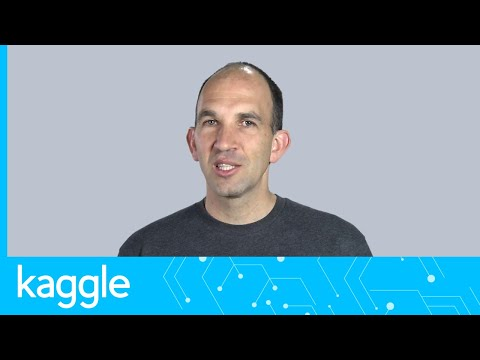

In [41]:
from IPython.display import YouTubeVideo
YouTubeVideo('fwNLf4t7MR8', width=800, height=450)

* Normally a convulution moves one pixel at a time when passing through the picture. If we change the movement or **stride** to 2 pixels then the scanning process takes a quarter of time, thus speeding up. Another option is max pooling, but stride is more cleaner. 

* For **Dropout**, we ignore randomly normal nodes and convulutions from previous layer; it prevents overfitting because it assures that one node is not heavily influencing the outcome


#### Code Snippet of training Model

In [ ]:
model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3),
                 strides=2, #strides
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Dropout(0.5)) #dropout of 0.5
model.add(Conv2D(30, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))